In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from get_data import get_req_data
import yahooquery as yq

In [2]:
# Param configuration
start_date = "2015-01-08"
end_date = "2015-01-15"

pd.set_option('display.max_rows', 20)

#Sector Map
sector_map = {
'S&P 500 Materials (Sector)' : 'basic_materials', 
'S&P 500 Industrials (Sector)' : 'industrials',
'S&P 500 Consumer Discretionary (Sector)' : 'consumer_cyclical' ,
'S&P 500 Consumer Staples (Sector)' : 'consumer_defensive',
'S&P 500 Health Care (Sector)' : 'healthcare', 
'S&P 500 Financials (Sector)' : 'financial_services',
'S&P 500 Information Technology (Sector)' : 'technology',
'S&P 500 Telecommunication Services (Sector)' : 'communication_services',
'S&P 500 Utilities (Sector)' : 'utilities', 
'S&P 500 Real Estate (Sector)' : 'realestate',
'S&P 500 Real Enegry (Sector)' : 'energy'
}


In [3]:
# Generate data frame to hold all required information
sectors_ticker = "SPY"

# Load in info
sp500_tickers_data = get_req_data(start_date, end_date)
weights = yq.Ticker(sectors_ticker).fund_sector_weightings.to_dict()

# add the sectors + dates + adj close to the dataframe
records = []
for sector, data in sp500_tickers_data.items():
    for x in range(0, len(data['sector_data'])):

        record = {"sector" : sector, "date" : data['sector_data'].index[x], "adj_close" : data["sector_data"][x], "sector_weight" : weights[sectors_ticker][sector_map[sector]] }
        records.append(record)

df = pd.DataFrame(records)

df["pct_change"] = df.groupby("sector")["adj_close"].pct_change()

df["contribution"] = df["pct_change"] * df["sector_weight"]

print(weights)
display(df)


{'SPY': {'realestate': 0.028900001, 'consumer_cyclical': 0.11270001, 'basic_materials': 0.0222, 'consumer_defensive': 0.070199996, 'technology': 0.2525, 'communication_services': 0.0841, 'financial_services': 0.128, 'utilities': 0.024500001, 'industrials': 0.083500005, 'energy': 0.0437, 'healthcare': 0.1439}}


,sector,date,adj_close,sector_weight,pct_change,contribution
0,S&P 500 Materials (Sector),2015-01-07,298.519989,0.0222,NaN,NaN
1,S&P 500 Materials (Sector),2015-01-08,305.600006,0.0222,0.023717,0.000527
2,S&P 500 Materials (Sector),2015-01-09,304.070007,0.0222,-0.005007,-0.000111
3,S&P 500 Materials (Sector),2015-01-12,303.130005,0.0222,-0.003091,-0.000069
4,S&P 500 Materials (Sector),2015-01-13,299.609985,0.0222,-0.011612,-0.000258
...,...,...,...,...,...,...
45,S&P 500 Real Estate (Sector),2015-01-07,195.850006,0.0289,NaN,NaN
46,S&P 500 Real Estate (Sector),2015-01-08,196.839996,0.0289,0.005055,0.000146
47,S&P 500 Real Estate (Sector),2015-01-09,197.130005,0.0289,0.001473,0.000043
48,S&P 500 Real Estate (Sector),2015-01-12,198.130005,0.0289,0.005073,0.000147


In [4]:
contributions = df.groupby("sector").agg({"contribution": "sum"})
contributions["contribution_as_pct"] = (contributions["contribution"] / df["contribution"].sum())*100
contributions

,contribution,contribution_as_pct
sector,,
S&P 500 Consumer Discretionary (Sector),-0.000277,-11.883425
S&P 500 Consumer Staples (Sector),0.000246,10.570471
S&P 500 Financials (Sector),-0.001343,-57.650107
S&P 500 Health Care (Sector),0.000514,22.061043
S&P 500 Industrials (Sector),0.000041,1.760995
S&P 500 Information Technology (Sector),0.001470,63.073064
S&P 500 Materials (Sector),0.000089,3.817281
S&P 500 Real Estate (Sector),0.000252,10.819562
S&P 500 Telecommunication Services (Sector),0.001313,56.327086


In [5]:
# weights

In [6]:
# yq.Ticker(sectors_ticker).fund_sector_weightings.SPY.sum()

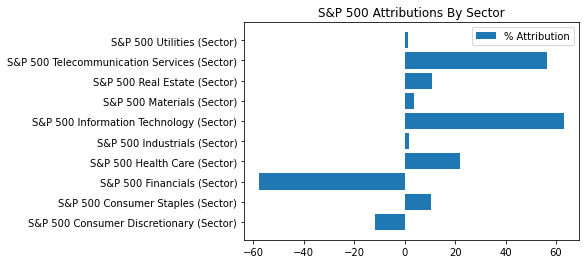

In [31]:
# Starting with visualisation:
import matplotlib.pyplot as plt
fig=plt.figure(1)
plt.barh(contributions.index, contributions["contribution_as_pct"],align="center")


plt.title("S&P 500 Attributions By Sector")
plt.legend(labels=["% Attribution"])
plt.show()

In [38]:
contributions_test = contributions.copy()
contributions_test.iloc[-1][1] = 100

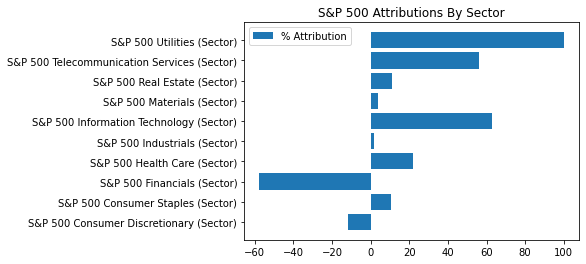

In [40]:
fig=plt.figure(1)
plt.barh(contributions_test.index, contributions_test["contribution_as_pct"],align="center")


plt.title("S&P 500 Attributions By Sector")
plt.legend(labels=["% Attribution"])
plt.show()